In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df=pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


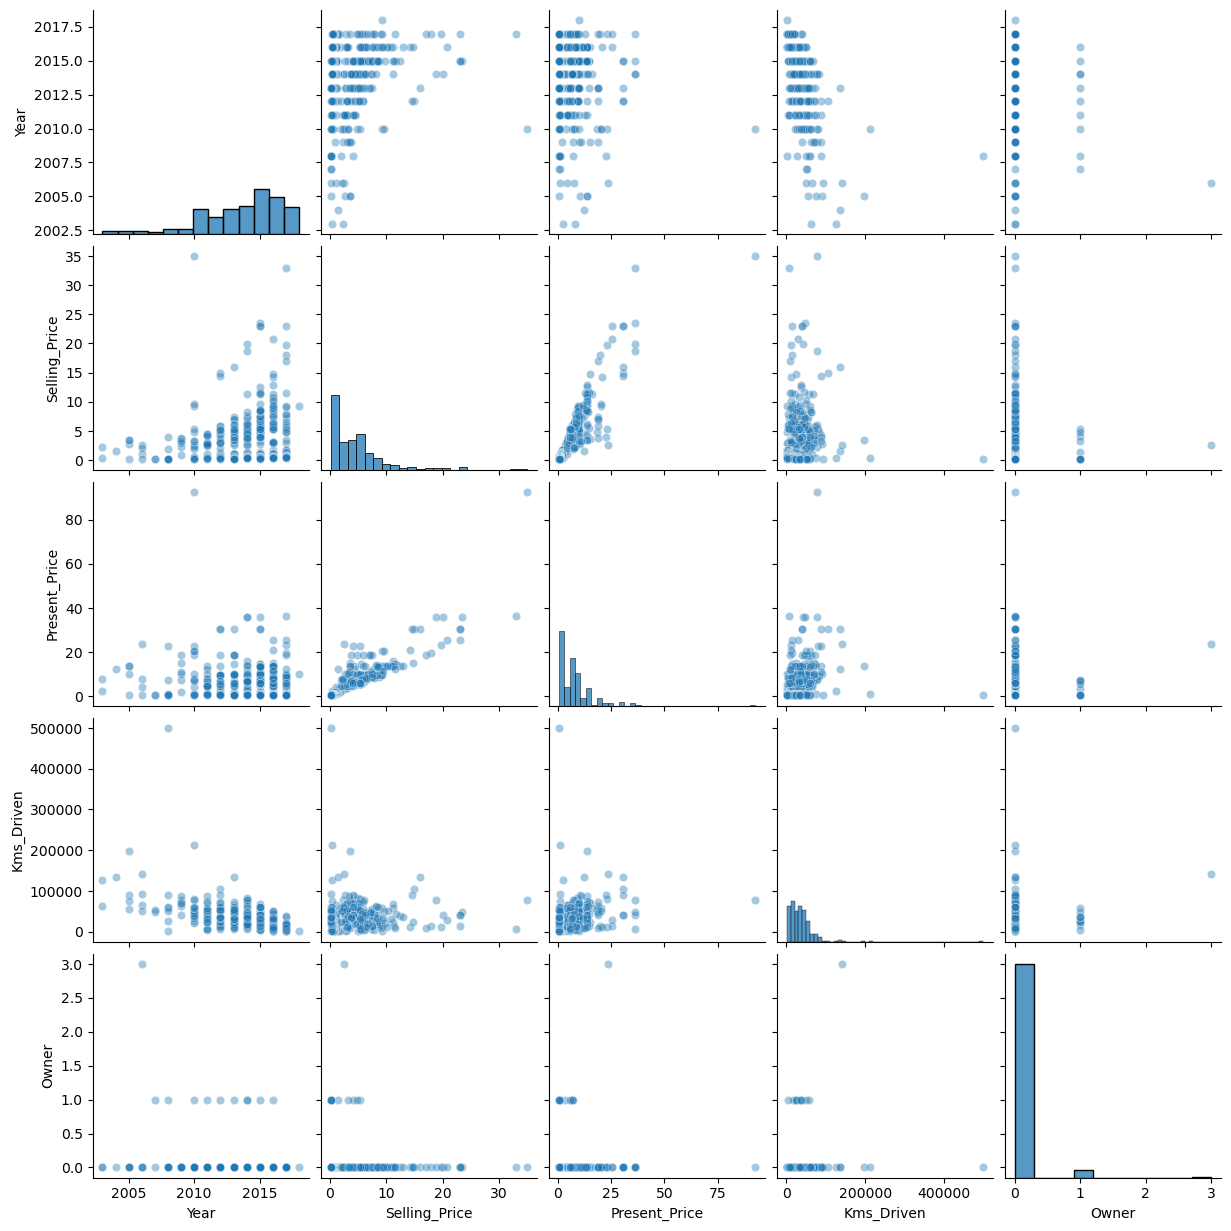

In [62]:
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.4})

In [13]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [14]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [15]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [38]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.preprocessing import OneHotEncoder


In [44]:
ohe = OneHotEncoder(drop='first', sparse_output=False)

X_train_new = ohe.fit_transform(
    x_train[['Fuel_Type','Seller_Type','Transmission']]
)
X_test_new = ohe.transform(
    x_test[['Fuel_Type','Seller_Type','Transmission']]
)

In [45]:
num_train = x_train.drop(['Fuel_Type','Seller_Type','Transmission'], axis=1)
num_test  = x_test.drop(['Fuel_Type','Seller_Type','Transmission'], axis=1)

In [46]:
x_train_final = np.hstack([num_train.values, X_train_new])
x_test_final  = np.hstack([num_test.values, X_test_new])

In [47]:
x_train_final

array([[2.0080e+03, 7.5000e-01, 2.6000e+04, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.0170e+03, 9.5000e-01, 3.5000e+03, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.0080e+03, 7.8700e-01, 5.0000e+04, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [2.0140e+03, 3.4500e+00, 1.6500e+04, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.0110e+03, 1.0000e+01, 6.9341e+04, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0170e+03, 1.7800e+00, 4.0000e+03, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [30]:
#applying linear reqgression

In [31]:
lr=LinearRegression()

In [48]:
lr.fit(x_train_final,y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(x_test_final)


In [51]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)


0.8489813024899205

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.8651552135512963

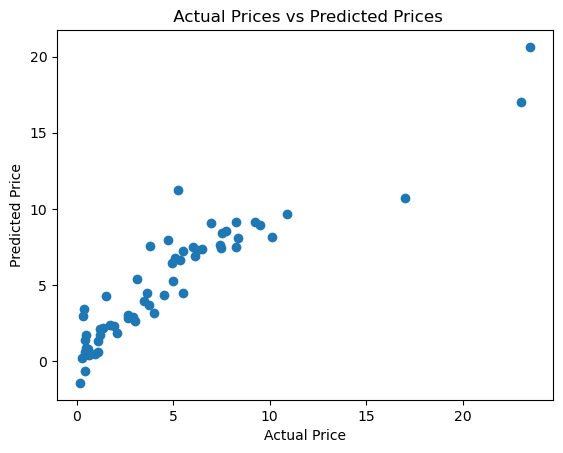

In [55]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()